# Import needed modules and useful functions

In [1]:
#-- useful python script for training the DeepTICA cvs --#
from utils import *

#-- to not visualize warnings --#
import warnings
warnings.filterwarnings('ignore')

# Simulation parameters 

In [2]:
kb=0.008314
#-- SIMULATION PARAMETERS --#
sim_parameters = {
    'temp':300, 
    'beta': 1./(300*kb),
    'kbt': None,
    #-- parameters to compute the fes --#
    'blocks':2,
    'bandwidth': 0.02,
    'plot_max_fes' :70,
}
#--------------------------------------#

# Prepare input files for plumed

In [3]:
folder = "unbias_A/bias2/"

Path(folder).mkdir(parents=True, exist_ok=True)

with open(folder+"plumed.dat","w") as file:
    print("""
# vim:ft=plumed

MOLINFO STRUCTURE=input.ala2.pdb
phi: TORSION ATOMS=@phi-2
psi: TORSION ATOMS=@psi-2
ene: ENERGY

# include descriptors
INCLUDE FILE=plumed_descriptors.data
# define cv
tica_cv1: CUSTOM ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45 VAR=x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44 FUNC=0.115904*(x0-0.151585)-0.083102*(x1-0.237498)+0.004473*(x2-0.241454)-0.248228*(x3-0.380417)+0.052555*(x4-0.467885)+0.313214*(x5-0.460289)-0.117923*(x6-0.532109)+0.031495*(x7-0.487855)-0.103044*(x8-0.596731)+0.125826*(x9-0.122433)-0.074376*(x10-0.133501)+0.198449*(x11-0.248004)+0.011834*(x12-0.349769)-0.205787*(x13-0.338213)+0.118448*(x14-0.420284)-0.227165*(x15-0.375843)+0.281897*(x16-0.498599)+0.005449*(x17-0.225601)-0.365752*(x18-0.286095)+0.167743*(x19-0.390567)+0.271311*(x20-0.365224)-0.077322*(x21-0.449590)+0.084006*(x22-0.389951)-0.112825*(x23-0.507428)+0.180485*(x24-0.147080)-0.119768*(x25-0.244131)-0.263853*(x26-0.250618)+0.060513*(x27-0.330135)+0.149048*(x28-0.313356)-0.083929*(x29-0.443694)-0.143955*(x30-0.153965)-0.204787*(x31-0.154636)+0.056654*(x32-0.241364)+0.080370*(x33-0.246807)-0.014512*(x34-0.381928)+0.186790*(x35-0.257056)-0.067996*(x36-0.312190)-0.050959*(x37-0.346238)+0.009977*(x38-0.471214)-0.021402*(x39-0.123035)-0.115308*(x40-0.134520)+0.047162*(x41-0.247371)+0.038217*(x42-0.225181)-0.016888*(x43-0.283352)-0.007616*(x44-0.146837) PERIODIC=NO
tica_cv2: CUSTOM ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45 VAR=x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44 FUNC=0.125917*(x0-0.151585)-0.064761*(x1-0.237498)-0.042591*(x2-0.241454)-0.044570*(x3-0.380417)+0.048525*(x4-0.467885)+0.044655*(x5-0.460289)-0.013008*(x6-0.532109)-0.107082*(x7-0.487855)+0.080497*(x8-0.596731)+0.111925*(x9-0.122433)+0.081747*(x10-0.133501)+0.026141*(x11-0.248004)-0.071408*(x12-0.349769)+0.252370*(x13-0.338213)-0.158961*(x14-0.420284)-0.043524*(x15-0.375843)-0.027356*(x16-0.498599)-0.050991*(x17-0.225601)-0.012750*(x18-0.286095)+0.023650*(x19-0.390567)-0.098312*(x20-0.365224)+0.062671*(x21-0.449590)+0.032804*(x22-0.389951)-0.006044*(x23-0.507428)-0.019215*(x24-0.147080)+0.024064*(x25-0.244131)-0.311679*(x26-0.250618)+0.177785*(x27-0.330135)+0.202708*(x28-0.313356)-0.103033*(x29-0.443694)+0.006520*(x30-0.153965)+0.400871*(x31-0.154636)-0.234240*(x32-0.241364)-0.305813*(x33-0.246807)+0.131805*(x34-0.381928)-0.002213*(x35-0.257056)-0.012353*(x36-0.312190)-0.011833*(x37-0.346238)+0.001229*(x38-0.471214)+0.279362*(x39-0.123035)+0.401018*(x40-0.134520)-0.116566*(x41-0.247371)-0.237362*(x42-0.225181)+0.043751*(x43-0.283352)+0.012493*(x44-0.146837) PERIODIC=NO

# bias 
opes: OPES_METAD ARG=tica_cv1,tica_cv2 TEMP=300 PACE=500 FILE=KERNELS BARRIER=40 STATE_WFILE=RestartKernels STATE_WSTRIDE=500*10
 
PRINT FMT=%g STRIDE=500 FILE=COLVAR ARG=*

ENDPLUMED
""",file=file)

#-- run gromacs --#
execute("cp ../script/input.* ../script/plumed_descriptors.data ../script/run_gromacs.sh "+folder,folder=".")
execute("./run_gromacs.sh",folder=folder)

Completed: cp ../script/input.* ../script/plumed_descriptors.data ../script/run_gromacs.sh unbias_A/bias2/
Completed: ./run_gromacs.sh


In [4]:
data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^d[^a-z]').columns.values
data_complete = load_dataframe("../angles/COLVAR")
X_complete = data_complete[descriptors_names].to_numpy()

Text(0, 0.5, '$\\psi$')

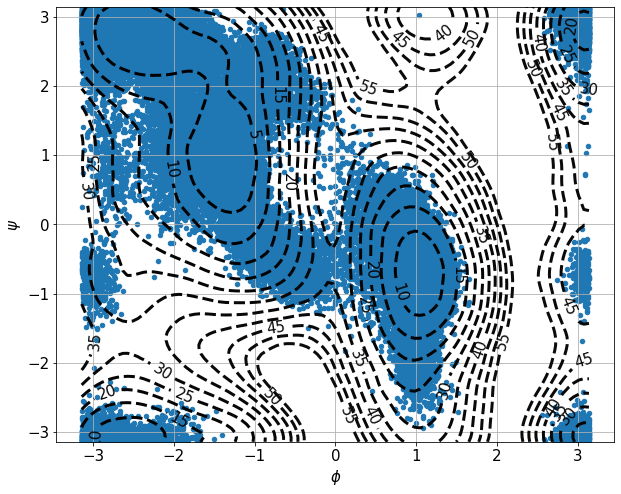

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
load_dataframe(folder+"COLVAR").plot.scatter(y="psi",x="phi",ax=ax)

fes = np.loadtxt("../angles/fes.txt",delimiter=" ")
grid0 = np.loadtxt("../angles/grid0.txt",delimiter=" ")
grid1 = np.loadtxt("../angles/grid1.txt",delimiter=" ")
bounds = np.arange(0, 60, 5.)
c = ax.contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
    norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
)
c.clabel()
ax.grid()
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\psi$")

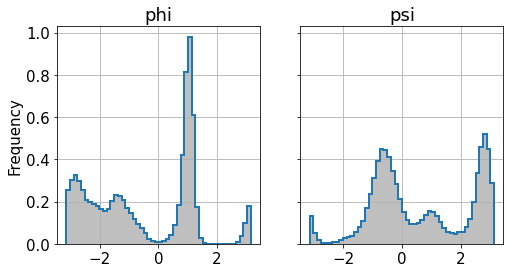

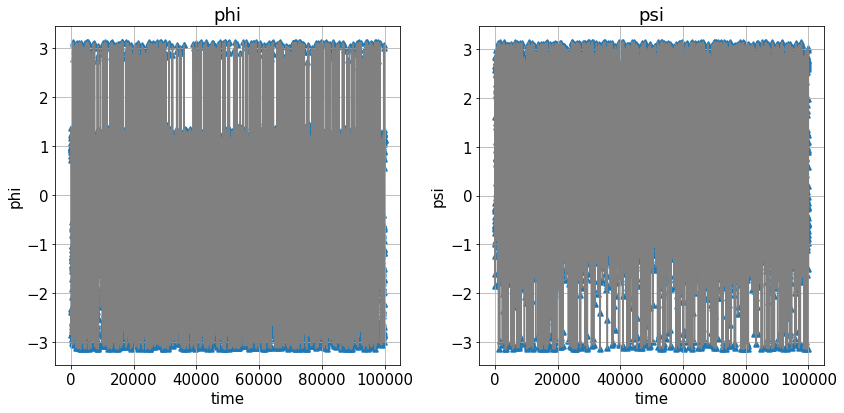

In [6]:
data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^p').columns.values

fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for ax,desc in zip(axs.flatten(),descriptors_names):
    data[desc].plot.hist(bins=50,alpha=1,ax=ax,legend=False,grid=True,histtype='step',linewidth=2,density=True)
    data[desc].plot.hist(bins=50,alpha=0.5,ax=ax,legend=False,grid=True,color="grey",density=True)
    ax.set_title(desc)

fig,axs = plt.subplots(1,2,figsize=(12,6))

for ax,desc in zip(axs.flatten(),descriptors_names):
    data[::10].plot.scatter(x="time",y=desc,alpha=1,ax=ax,legend=False,grid=True,linewidth=2,marker="^")
    data[::10].plot.line(x="time",y=desc,alpha=1,ax=ax,legend=False,grid=True,color="grey")
    ax.set_title(desc)

plt.tight_layout()

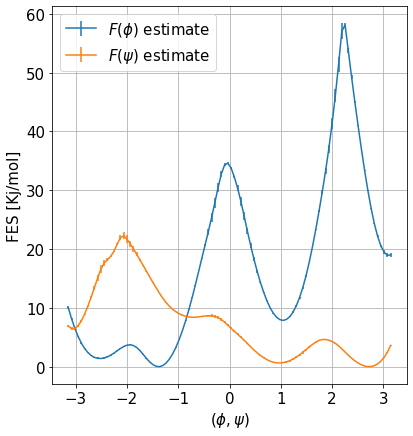

In [7]:
#-- estimation of Free Energy Surface --#
s = load_dataframe(folder+"COLVAR").filter(regex="^p").to_numpy()
logweight = np.transpose( load_dataframe(folder+"COLVAR").filter(regex="^opes.bias$").to_numpy() )[0]*sim_parameters["beta"]
logweight = logweight - np.max(logweight)

fig, ax = plt.subplots(figsize=(6,6))
for i in range(2):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=sim_parameters["blocks"],
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
ax.legend([r"$F(\phi)$ estimate",r"$F(\psi)$ estimate"])   
ax.grid()
plt.tight_layout()
ax.set_xlabel(r"$(\phi,\psi)$")
ax.set_ylabel("FES [Kj/mol]")

plt.show()

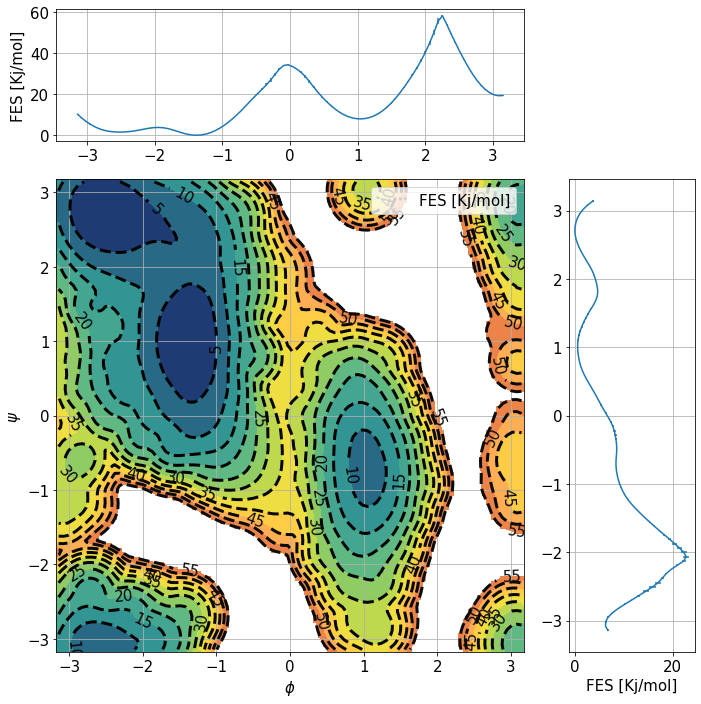

In [8]:
gridspec_fes(s,logweight,sim_parameters)

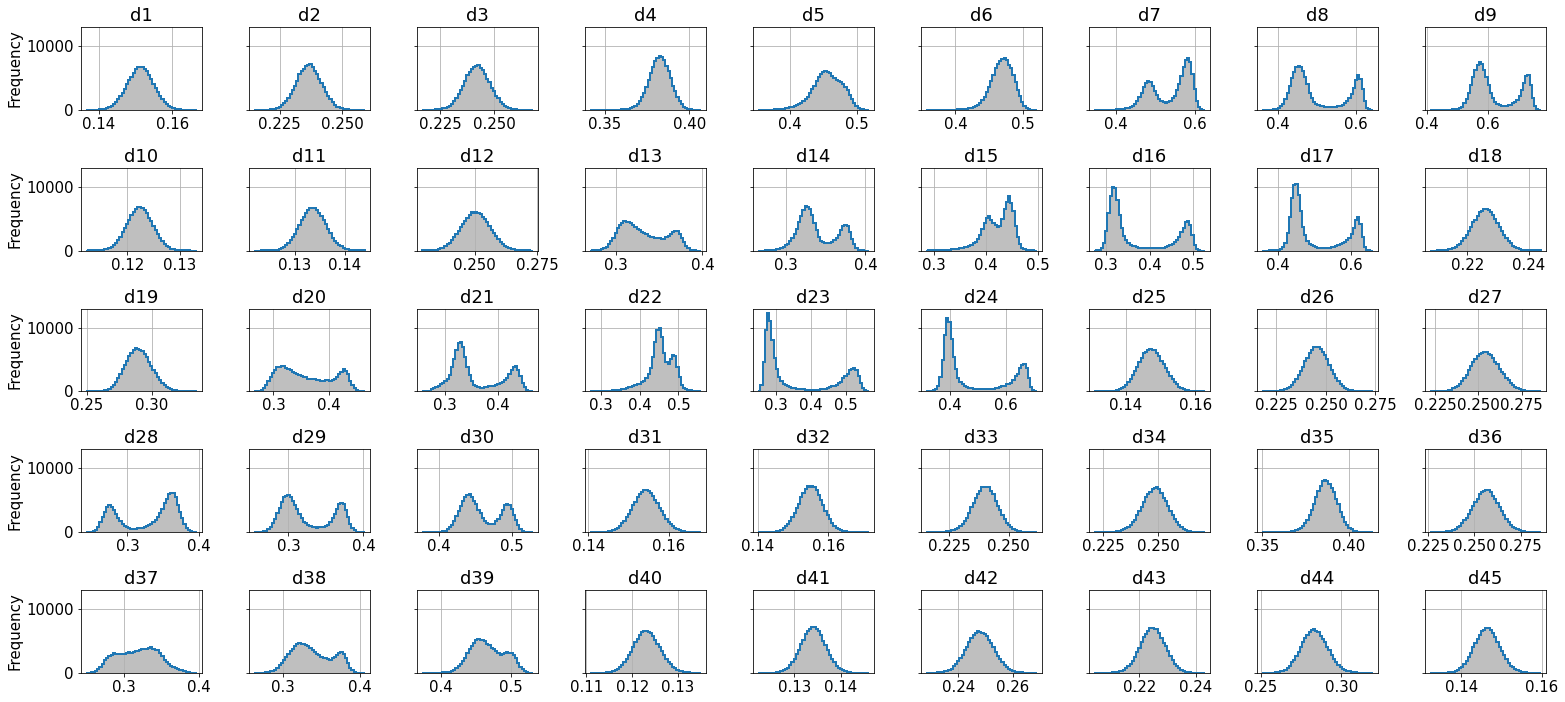

In [9]:
data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^d[^a-z]').columns.values

fig,axs = plt.subplots(5,9,figsize=(22,10),sharey=True)

for ax,desc in zip(axs.flatten(),descriptors_names):
    data[desc].plot.hist(bins=50,alpha=1,ax=ax,legend=False,grid=True,histtype='step',linewidth=2)#,density=True)
    data[desc].plot.hist(bins=50,alpha=0.5,ax=ax,legend=False,grid=True,color="grey")#,density=True)
    ax.set_title(desc)

plt.tight_layout()

In [10]:
#-- TRAINING PARAMETERS --#
n_output = 2
n_input = 45
train_parameters = {
              'descriptors': '^d[^a-z]',
              'lag_time':15,
              'standardize_outputs':True,
              'standardize_inputs': True,
              #if reweight the timescale
              "reweighting": True,
              "step": 20 #se prendo tutti i valori fallisce il cholesky decomposition.. issue con pytorch
              }
#--------------------------------------#

In [11]:
lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,25]
time = []
torch.manual_seed(21)
timescale = np.empty(len(lags))
for i,lag in enumerate(lags):
    train_parameters["lag_time"] = lag
    #print("lag time ", lag)
    model,data,logweight,X,names = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

    #-- move the model back to cpu for convenience --# 
    model.to('cpu')

    timescale[i] = model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1]

[1.15130782 0.13172114 0.07298476 0.36263233 0.12994355 0.12854469
 0.14495611 0.0647434  0.05175808 0.12762117 0.12658384 0.16085574
 0.16751504 0.14678212 0.13551179 0.11920829 0.04230413]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 25]


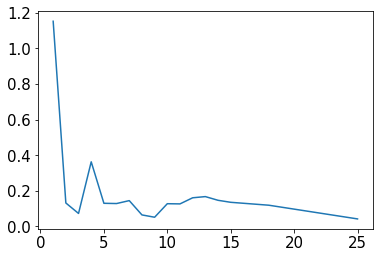

In [12]:
plt.plot(lags,timescale)
print(timescale)
print(lags)

## DeepTICA Analysis and Export

In [14]:
torch.manual_seed(21)
train_parameters["lag_time"] = 4
model,data,logweight,X,names = training(sim_parameters["beta"],folder+"COLVAR",train_parameters,tprime=None)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

model.set_params({"feature_names": names})
print( model.plumed_input() )

timescales:  [-36.498318   14.112625    8.525904    8.122675    8.053101    7.465006
   7.255964    7.1309423   7.105117    7.0041137   6.825934    6.786628
   6.645201    6.6023374   6.535473    6.4911256   6.4474096   6.3148303
   6.290852    6.2428403   6.1909485   6.0971704   6.017236    5.982022
   5.898434    5.7838078   5.7487206   5.717049    5.671632    5.616231
   5.5225415   5.4776545   5.450403    5.3528686   5.2844563   5.23469
   5.189362    5.0996284   5.0284457   4.9615755   4.8441653   4.669446
   4.628601    4.489014    4.2358246]
eigenvalues:  [1.115825   0.7531927  0.62552845 0.61112815 0.6085336  0.58518136
 0.5762172  0.57067484 0.5695125  0.56490767 0.55654883 0.5546631
 0.547749   0.54561263 0.54224116 0.5399785  0.53772706 0.5307684
 0.52948844 0.52690554 0.5240833  0.51890105 0.5143985  0.5123895
 0.5075571  0.50078124 0.49867186 0.49675333 0.49397796 0.49055326
 0.48466167 0.48179355 0.4800377  0.47366124 0.46910113 0.4657375
 0.46263927 0.45640674 0.45136705

In [15]:
data = load_dataframe(folder+"COLVAR")
X = data.filter(regex=train_parameters["descriptors"]).values
data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
data["cv3"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[2]
data["cv4"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[3]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]
data_complete["cv3"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[2]
data_complete["cv4"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[3]

<AxesSubplot:ylabel='Frequency'>

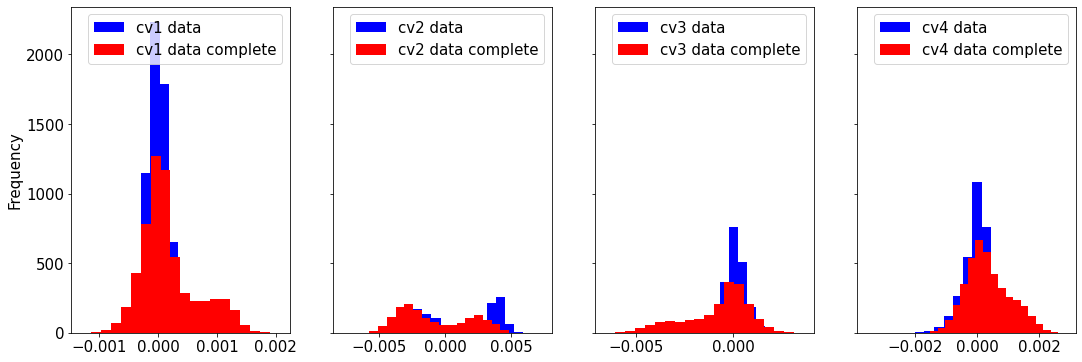

In [16]:
fig,axs = plt.subplots(1,4,figsize=(18,6),sharey=True)
data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b",label="cv1 data")
data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="b",label="cv2 data")
data.plot.hist(y="cv3",bins=20,ax=axs[2],density=True,color="b",label="cv3 data")
data.plot.hist(y="cv4",bins=20,ax=axs[3],density=True,color="b",label="cv4 data")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="r",label="cv1 data complete")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="r",label="cv2 data complete")
data_complete.plot.hist(y="cv3",bins=20,ax=axs[2],density=True,color="r",label="cv3 data complete")
data_complete.plot.hist(y="cv4",bins=20,ax=axs[3],density=True,color="r",label="cv4 data complete")

## Power Spectral density

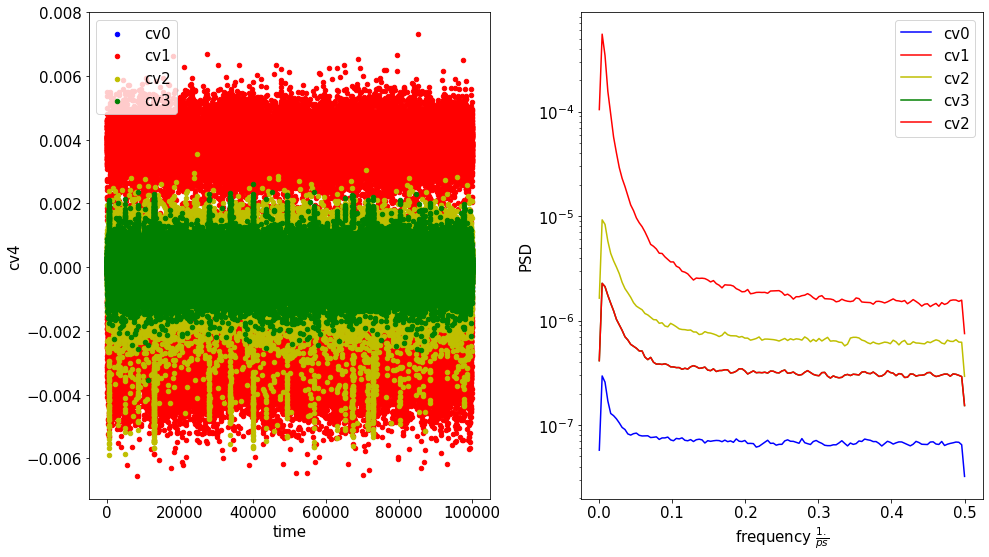

In [19]:
## time series
colors = ["b","r","y","g"]
fig,axs = plt.subplots(1,2,figsize=(14,8))
for j,c in enumerate(colors):
    data.plot.scatter(y="cv"+str(j+1),x="time",ax=axs[0],color=c,label="cv"+str(j))
axs[0].legend()
from scipy import signal
## PSD
T = 1 # valued saved each ps
fs = 1/T # frequency 
for j,c in enumerate(colors):
    f, Pxx = signal.welch(data["cv"+str(j+1)].to_numpy()[:], fs)
    #axs[1].plot(f, Pxx, color=c,label="cv"+str(j))
    axs[1].semilogy(f,Pxx, color=c,label="cv"+str(j)); #axs[1].semilogx()
axs[1].semilogy(f,Pxx, color="r",label="cv2"); #axs[1].semilogx()
axs[1].set_xlabel(r"frequency $\frac{1.}{ps}$")
axs[1].set_ylabel(r"PSD")
axs[1].legend()
plt.tight_layout()

We can also plot the correlation (*Pearson* correlation ,which simply means normed correlation) of the Deep-TICA cvs with the descriptors

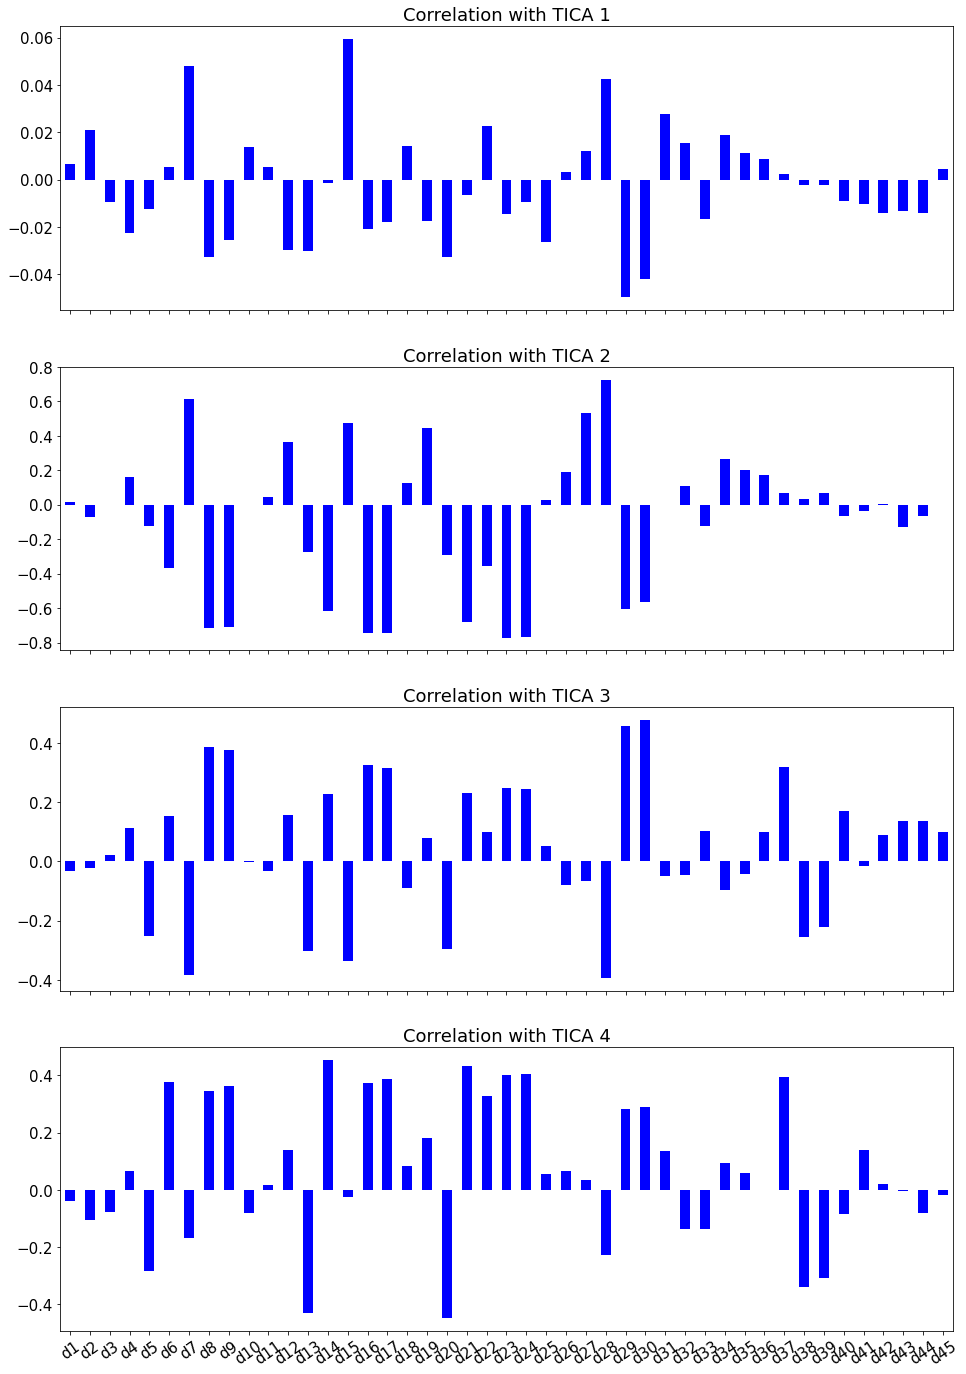

In [20]:
fig,axs = plt.subplots(4,1,figsize=(16,24),sharex=True)
for k,cv in enumerate(["cv1","cv2","cv3","cv4"]):
    cols = [cv]
    cols.extend(data.filter(regex=train_parameters["descriptors"]).columns)
    corr = data[cols].corr(method='pearson')
    corr[cv].drop(cv).plot(kind='bar', ax=axs[k], rot=35, color="b",label=r"$C(tica|desc)$")
    axs[k].set_title('Correlation with TICA '+str(k+1))
plt.show()

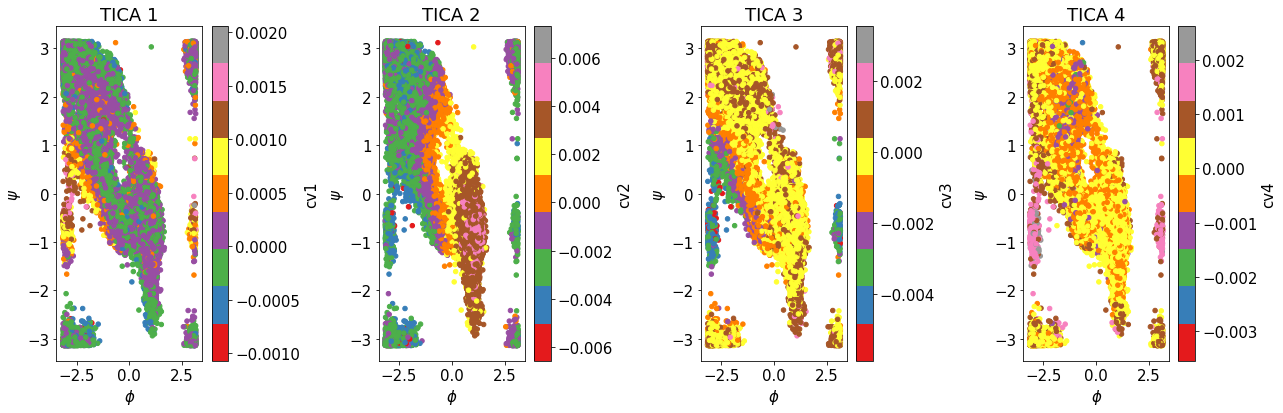

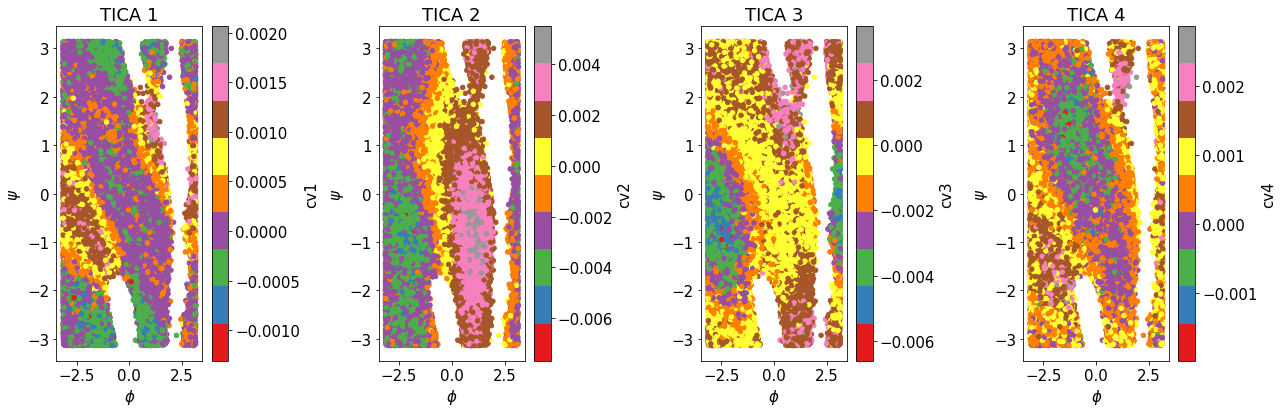

In [21]:
fig,axs = plt.subplots(1,4,figsize=(18,6))
for k,ax in enumerate(axs):
    data.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="Set1",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,4,figsize=(18,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="Set1",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('TICA '+str(k+1))
plt.tight_layout()

### FES estimate from new cvs   

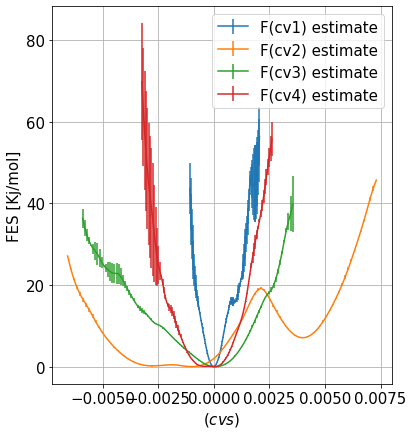

In [22]:
#-- estimation of Free Energy Surface --#
s = data.filter(regex="^cv").to_numpy()
logweight = np.transpose( load_dataframe(folder+"COLVAR").filter(regex="^opes.bias$").to_numpy() )[0]*sim_parameters["beta"]
logweight = logweight - np.max(logweight)

fig, ax = plt.subplots(figsize=(6,6))
for i in range(4):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=sim_parameters["blocks"],
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
ax.legend(["F(cv1) estimate","F(cv2) estimate","F(cv3) estimate","F(cv4) estimate"])   
ax.grid()
plt.tight_layout()
ax.set_xlabel(r"$(cvs)$")
ax.set_ylabel("FES [Kj/mol]")

plt.show()

### FES estimate from old cvs  

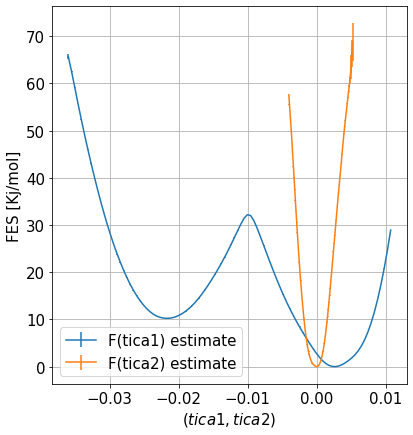

In [23]:
s = data.filter(regex="^tica").to_numpy()

fig, ax = plt.subplots(figsize=(6,6))
for i in range(2):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=sim_parameters["blocks"],
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
ax.legend(["F(tica1) estimate","F(tica2) estimate"])   
ax.grid()
plt.tight_layout()
ax.set_xlabel(r"$(tica1,tica2)$")
ax.set_ylabel("FES [Kj/mol]")

plt.show()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [24]:
Boltzmann_product(model,model,X,j=0,k=1,logweight=logweight)

2.7462307829010316e-10

## $\Delta F$ Estimate

Text(0.5, -0.03, 'shadow error of 1KbT')

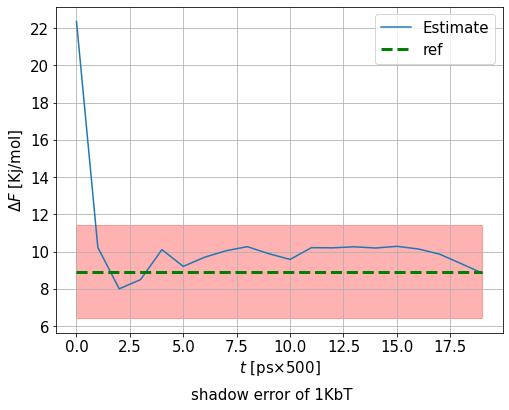

In [25]:
res = 8.92808817900219
#-- each step is 1ps --#
#-- we are interested in the first 10 ns --#
last = 1*1000*10 #last ns
data = load_dataframe(folder+"COLVAR").filter(regex="^phi").to_numpy()[:last]
logweight= np.transpose( load_dataframe(folder+"COLVAR").filter(regex="^opes.bias$").to_numpy() )[0][:last]
logweight= (logweight-np.max(logweight))*sim_parameters["beta"]
#-- with CLEAR set to 1000 I perform the estimation every ns --#
CLEAR=500

deltaf = np.empty(0)
for el in np.arange(CLEAR,len(data)+CLEAR,CLEAR):
    s = data[:el]
    weight = np.exp(logweight[:el])
    fes,grid,bounds,error = compute_fes(s, weights=weight,
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=2,
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=False)
    ind1 = (grid<0) 
    ind2 = (grid>0) 
    grid1 = grid[ ind1 ]
    grid2 = grid[ ind2 ] 
    I1 = integrate.trapz(np.exp(-fes[ind1]*sim_parameters["beta"]), grid1)
    I2 = integrate.trapz(np.exp(-fes[ind2]*sim_parameters["beta"]), grid2)
    
    deltaf = np.append(deltaf,(1/sim_parameters["beta"])*np.log(I1/I2))

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(np.arange(len(deltaf)),deltaf,label="Estimate")
res = np.full(len(deltaf),res)
err = np.full(len(deltaf),1*kb*sim_parameters["temp"])
ax.plot(np.arange(len(deltaf)),res,linestyle='--',linewidth=3,color="g",label="ref")
ax.fill_between(np.arange(len(deltaf)) , res-err, res+err , color="r",zorder=0,alpha=0.3)
ax.grid()
ax.legend()
ax.set_xlabel(r"$t$ [ps$\times$"+str(CLEAR)+"]")
ax.set_ylabel(r"$\Delta F$ [Kj/mol]")
txt = "shadow error of 1KbT"
# center text
fig.text(.5, -.03, txt, ha='center')